# Importing Libraries

In [34]:
import pandas as pd
#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium#for mapping purpose
from folium import plugins
#manipulating the plot size
plt.rcParams['figure.figsize'] = 10, 12

# neglecting the warnings 
import warnings
warnings.filterwarnings('ignore')


#Reading the datasets

In [35]:
#creating a datafram using pandas
df = pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()#to keep the original dataset untouched
print(df)

    S. No. Name of State / UT  ...  Cured  Death
0        1     Andhra Pradesh  ...      0      0
1        2              Bihar  ...      0      1
2        3       Chhattisgarh  ...      0      0
3        4              Delhi  ...      6      1
4        5            Gujarat  ...      0      1
5        6            Haryana  ...     11      0
6        7   Himachal Pradesh  ...      0      1
7        8          Karnataka  ...      3      1
8        9             Kerala  ...      4      0
9       10     Madhya Pradesh  ...      0      0
10      11        Maharashtra  ...      0      2
11      12            Manipur  ...      0      0
12      13            Mizoram  ...      0      0
13      14             Odisha  ...      0      0
14      15         Puducherry  ...      0      0
15      16             Punjab  ...      0      1
16      17          Rajasthan  ...      3      0
17      18         Tamil Nadu  ...      1      0
18      19          Telengana  ...      1      0
19      20         C

In [36]:
#reading coordinates of Indian states and union territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')
#day-by-day data of india,korea,italy and wuhan
dbd_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="India")
dbd_korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Korea")
dbd_italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Italy")
dbd_wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Wuhan")

#Analysing COVID cases in India

In [37]:
#now i am creating a total cases attribute which gives the total confirmed cases(foreign+national)
df.drop(['S. No.'],axis=1,inplace=True)#dropping the serial no column
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
print(df['Total cases'])
total_cases = df['Total cases'].sum()
print('Total no. of confirmed cases in India as of March 22,2020:',total_cases)

0       9
1       3
2       1
3      31
4      33
5      28
6       3
7      41
8     109
9       9
10    101
11      1
12      1
13      2
14      1
15     29
16     32
17     18
18     35
19      7
20      7
21     13
22     35
23      4
24      9
Name: Total cases, dtype: int64
Total no. of confirmed cases in India as of March 22,2020: 562


In [38]:
#highlighting the dataframe
df.style.background_gradient(cmap="Reds")

#No of active cases in States and UTs

In [39]:
df['Total Active'] = df['Total cases'] - df['Death'] - df['Cured']
total_active_cases = df['Total Active'].sum()
print('Total no. of active cases in India as of March 22 2020:',total_active_cases)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total no. of active cases in India as of March 22 2020: 512


#Visualising spread on Map

In [40]:
# folium for plotting in the map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
#zip returnn an object an can be used to iterate easily
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

#Confirmed Vs Recovered Cases

[Text(0, 0.5, ''), (0.0, 35.0), Text(0.5, 0, 'Cases')]

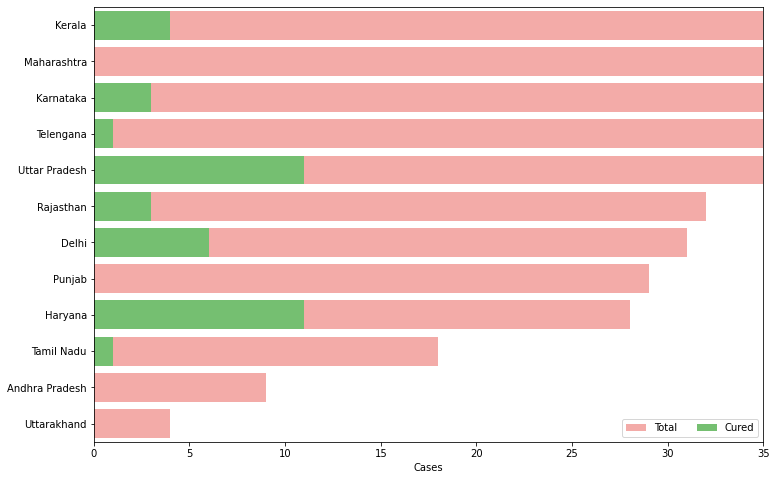

In [41]:
#using Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)#just to showcase the highest values
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
#sns.despine(left=True, bottom=True)#removes spine from the graph

#How the coronavirus cases are rising

In [42]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [43]:
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
#add_trace() using this new traces can be created in graph
fig.add_trace(go.Scatter(x=dbd_india['Date'], y = dbd_india['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

#Cumulative cases in India,Italy,Wuhan and S.Korea

In [44]:
# import plotly.express as px
fig = px.bar(dbd_india, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

###Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- There has been only 3 confirmed cases in Wuhan since last week. They have almost controlled the COVID-19

#Comparison between rise of cases in these countries

In [45]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_korea['Date'], y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_italy['Date'], y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_india['Date'], y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=dbd_wuhan['Date'], y=dbd_wuhan['Total Cases'],
 #                  marker=dict(color=dbd_wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

#Trend after crossing 100 cases

In [46]:
# import plotly.graph_objects as go

labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 3, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_korea['Days after surpassing 100 cases'], 
                 y=dbd_korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_italy['Days after surpassing 100 cases'], 
                 y=dbd_italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_india['Days after surpassing 100 cases'], 
                 y=dbd_india['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

**Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

#Exploring world wide data

In [47]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [48]:
df_deaths.head()

Province/State      Country      Lat  ...  3/22/20  3/23/20  3/24/20
0            NaN  Afghanistan  33.0000  ...        1        1        1
1            NaN      Albania  41.1533  ...        2        4        5
2            NaN      Algeria  28.0339  ...       17       17       19
3            NaN      Andorra  42.5063  ...        1        1        1
4            NaN       Angola -11.2027  ...        0        0        0

[5 rows x 67 columns]

In [49]:
df.head()

Province/State    Country      Lat  ...  Confirmed Deaths  Recovered
0            NaN   Thailand  15.0000  ...        2.0    0.0        0.0
1            NaN      Japan  36.0000  ...        2.0    0.0        0.0
2            NaN  Singapore   1.2833  ...        0.0    0.0        0.0
3            NaN      Nepal  28.1667  ...        0.0    0.0        0.0
4            NaN   Malaysia   2.5000  ...        0.0    0.0        0.0

[5 rows x 8 columns]

In [50]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

Date    Country  ... Deaths  Recovered
0 2020-01-22  Australia  ...    0.0        0.0
1 2020-01-22  Australia  ...    0.0        0.0
2 2020-01-22  Australia  ...    0.0        0.0
3 2020-01-22  Australia  ...    0.0        0.0
4 2020-01-22  Australia  ...    0.0        0.0

[5 rows x 6 columns]

In [51]:
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Date  Confirmed  Deaths  Recovered
0  2020-01-22        0.0     0.0        0.0
1  2020-01-23        0.0     0.0        0.0
2  2020-01-24        0.0     0.0        0.0
3  2020-01-25        0.0     0.0        0.0
4  2020-01-26        0.0     0.0        0.0
..        ...        ...     ...        ...
57 2020-03-19      194.0     4.0       15.0
58 2020-03-20      244.0     5.0       20.0
59 2020-03-21      330.0     4.0       23.0
60 2020-03-22      396.0     7.0       27.0
61 2020-03-23      396.0     7.0       27.0

[62 rows x 4 columns]

In [52]:
df.groupby('Date').sum().head()

Lat       Long  Confirmed  Deaths  Recovered
Date                                                          
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0

#Visualising World wide COVID-19 Cases

In [53]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [54]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()